# Case Study: Event Impact Analysis on Hotel Performance Metrics
### Analysis by Nabil Mustafa

# Introduction

The process used in this study is based on the following stages:

1. Problem Understanding
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Selection/Engineering
5. Model Selection and Design
6. Model Evaluation
7. Model Optimization
8. Interpretation and Reporting

# 1. Problem Understanding


Goal:
* Understand the problem, key questions, and objectives

Key Activities:

* Define the objective of the problem.
* Verify the datasets provided.
* Obseve the dataset at a high level.
* Asking business questions that lead to insights and guide study.



## 1.1. Objective:
Analyse the impact of events on hotel performance metrics using the provided datasets. Candidates are expected to explore the relationship between event characteristics (e.g., type, location, expected attendance) and key hotel performance indicators (occupancy rates, ARR, and number of guests). Based on the insights gathered, develop a predictive model that forecasts future hotel performance metrics, leveraging information on upcoming events.

## 1.2. Datasets Provided:

1. Events
2. Hotels Performance

Events dataset: Contains information about different events (e.g., concerts, exhibitions, festivals) including date, type, location, and expected attendance.

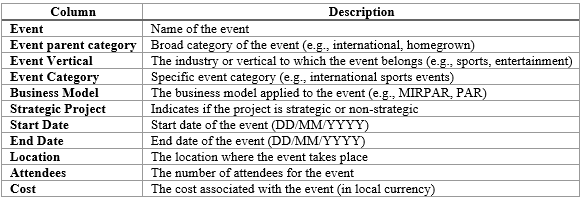

Hotels performance dataset: Includes hotel performance metrics such as occupancy rates, average daily rate (ADR), revenue per available room (RevPAR), and number of guests, segmented by location and time.

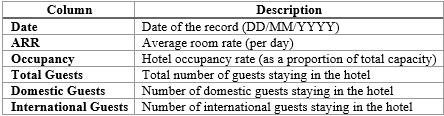



## 1.3. Dataset General Observation

In [704]:
# Importing necessary libraries
import pandas as pd

# Load the datasets

events_dataset_path = '/content/drive/MyDrive/PROJECTS/EVENT_HOTEL_IMPACT/events.csv'
hotels_dataset_path = '/content/drive/MyDrive/PROJECTS/EVENT_HOTEL_IMPACT/hotel.csv'

events_df = pd.read_csv(events_dataset_path)
hotels_df = pd.read_csv(hotels_dataset_path)

# 1. Display the first few rows of each dataset (to check the structure)
print("First 5 rows of the Events Dataset:")
print(events_df.head())

print("\nFirst 5 rows of the Hotels Performance Dataset:")
print(hotels_df.head())

# 2. General information about each dataset (column names, non-null count, data types)
print("\nGeneral Information about Events Dataset:")
print(events_df.info())

print("\nGeneral Information about Hotels Performance Dataset:")
print(hotels_df.info())

# 3. Descriptive statistics for numeric columns in each dataset
print("\nDescriptive Statistics of the Events Dataset:")
print(events_df.describe())

print("\nDescriptive Statistics of the Hotels Performance Dataset:")
print(hotels_df.describe())

# 4. Check for missing values in both datasets
print("\nMissing Values in Events Dataset:")
print(events_df.isnull().sum())

print("\nMissing Values in Hotels Performance Dataset:")
print(hotels_df.isnull().sum())

# 5. Check for categorical variables and their unique values
print("\nUnique Values in Categorical Columns (Events Dataset):")
for col in events_df.select_dtypes(include=['object']).columns:
    print(f"{col}: {events_df[col].nunique()} unique values")

print("\nUnique Values in Categorical Columns (Hotels Performance Dataset):")
for col in hotels_df.select_dtypes(include=['object']).columns:
    print(f"{col}: {hotels_df[col].nunique()} unique values")


First 5 rows of the Events Dataset:
   Unnamed: 0            Event Event parent category Event Vertical  \
0           0   Kenneth Warner         international  Entertainment   
1           1      Chong Klein             homegrown  Entertainment   
2           2  Sterling Brewer         international         Sports   
3           3   Gordon Compton         international  Entertainment   
4           4   Frederic Carey         international  Entertainment   

                       Event Category Business Model Strategic Project  \
0  International Entertainment Events         MIRPAR   Non - Strategic   
1      Homegrown Entertainment Events            PAR   Non - Strategic   
2         International Sports Events          DOWNE   Non - Strategic   
3  International Entertainment Events         MIRPAR   Non - Strategic   
4  International Entertainment Events         MIRPAR   Non - Strategic   

   Start Date    End Date           Location Attendees          Cost  
0  07/01/2023  07/01/

## 1.4. Business Oiented Questions

To gather meaningful insights from the data in your case study, here are some key questions to consider for both datasets:

### Event Dataset
1. **Event Categories:**
   - How do different event types (e.g., concerts, exhibitions) impact hotel metrics like occupancy rates and ADR? Are some types of events consistently associated with higher hotel performance?
   - Does the broad event category (e.g., international vs. homegrown) have a noticeable effect on hotel performance?

2. **Event Location:**
   - Do events held in certain locations (e.g., central city vs. suburban) have a stronger impact on hotel metrics?
   - Is there a relationship between the proximity of the event location to the hotel and the performance metrics?

3. **Event Attendance:**
   - How does the number of attendees influence hotel occupancy rates, ADR, and the number of guests?
   - Is there a threshold number of attendees that significantly impacts hotel performance, or does it scale linearly?

4. **Event Duration:**
   - How do multi-day events impact hotel performance compared to single-day events?
   - Does hotel performance change leading up to the start of an event or after it ends?

5. **Event Costs:**
   - Does the cost associated with organizing the event correlate with higher attendance or better hotel performance metrics?
   - Can high-cost events be linked to specific types of guests (domestic vs. international)?

6. **Strategic Events:**
   - How do strategic events compare to non-strategic events in their impact on hotel performance metrics?
   - Are strategic events associated with certain types of event categories or locations that lead to higher hotel performance?

---

### Hotel Performance Dataset
1. **Date and Time Trends:**
   - Are there any seasonal trends in hotel performance metrics? For example, do hotels perform better during certain months or days of the week?
   - How does hotel performance differ during holidays, weekends, or peak tourist seasons?

2. **Occupancy vs. ARR:**
   - Is there a direct relationship between occupancy rates and ADR (i.e., higher occupancy leading to higher room rates)? Or do events impact occupancy and ARR differently?
   - Are there periods where ADR increases even when occupancy remains stable?

3. **Domestic vs. International Guests:**
   - How do domestic and international guests differ in terms of their impact on hotel metrics? For example, do international guests tend to spend more (resulting in higher ADR)?
   - Are certain events more likely to attract international guests, and how does this affect hotel performance?

4. **Location-Specific Insights:**
   - How does hotel performance vary by location? Do certain hotels consistently outperform others during events?
   - Are certain locations more impacted by specific types of events (e.g., festivals in central areas vs. exhibitions in suburban areas)?

5. **Guest Trends:**
   - How does the total number of guests fluctuate during and around major events?
   - Is there a significant difference between the number of guests before, during, and after an event?

---

### Integrating Insights Across Datasets
1. **Event Impact on Hotel Metrics:**
   - Can you identify a clear link between specific event types and an increase in key hotel metrics (e.g., concerts driving higher occupancy)?
   - Do certain event characteristics (attendance, location, category) consistently predict stronger performance for hotels?

2. **Prediction of Future Metrics:**
   - Which event characteristics are the strongest predictors for forecasting future occupancy rates, ADR, or number of guests?
   - Can you develop a model that accounts for seasonality, event attendance, and location to predict hotel performance during upcoming events?

Answering these questions will provide deep insights into the relationship between events and hotel performance. Would you like to focus on any specific area or question to begin your analysis?

# 2. Data Cleaning & Preprocessing

**Goal**
- Prepare the dataset for analysis by handling missing, noisy, or inconsistent data.

**Key Activities**

* Label columns to convey meaning
* Standardize data formats to optimize (e.g., dates, numerical units).
* Handle missing values (e.g., imputation or removal).
* Remove duplicates and fix data inconsistencies.
* Feature engineering: Create or transform features to enrich the dataset (e.g., calculate distance from events, create event duration).

## 2.1. Re-Label Columns to Convey Meaning & Clarity

In [705]:
import pandas as pd

# Load the datasets

events_dataset_path = '/content/drive/MyDrive/PROJECTS/EVENT_HOTEL_IMPACT/events.csv'
hotels_dataset_path = '/content/drive/MyDrive/PROJECTS/EVENT_HOTEL_IMPACT/hotel.csv'

events_df = pd.read_csv(events_dataset_path)
hotels_df = pd.read_csv(hotels_dataset_path)


# Remove the first column from the Events dataset
events_df = events_df.iloc[:, 1:]


# Renaming columns in the Events dataset for clarity
events_df = events_df.rename(columns={
    'Event': 'Event_Name',
    'Event parent category': 'Event_Parent_Category',
    'Event Vertical': 'Event_Vertical',
    'Event Category': 'Event_Category',
    'Business Model': 'Business_Model',
    'Strategic Project': 'Is_Strategic_Project',
    'Start Date': 'Event_Start_Date',
    'End Date': 'Event_End_Date',
    'Location': 'Event_Location',
    'Attendees': 'Expected_Attendees',
    'Cost': 'Event_Cost'
})

# Remove the first column from the Hotels Performance dataset
hotels_df = hotels_df.iloc[:, 1:]

# Renaming columns in the Hotels Performance dataset
hotels_df = hotels_df.rename(columns={
    'Date': 'Record_Date',
    'ARR': 'Average_Room_Rate',
    'Occupancy': 'Occupancy_Rate',
    'Total Guests': 'Total_Guests',
    'Domestic Guests': 'Domestic_Guests',
    'International Guests': 'International_Guests'
})

# Display the new column names for both datasets
print("Renamed Columns in Events Dataset:")
print(events_df.columns)

print("\nRenamed Columns in Hotels Performance Dataset:")
print(hotels_df.columns)


Renamed Columns in Events Dataset:
Index(['Event_Name', 'Event_Parent_Category', 'Event_Vertical',
       'Event_Category', 'Business_Model', 'Is_Strategic_Project',
       'Event_Start_Date', 'Event_End_Date', 'Event_Location',
       'Expected_Attendees', 'Event_Cost'],
      dtype='object')

Renamed Columns in Hotels Performance Dataset:
Index(['Record_Date', 'Average_Room_Rate', 'Occupancy_Rate', 'Total_Guests',
       'Domestic_Guests', 'International_Guests'],
      dtype='object')


## 2.2. Standardize Data Formats to Optimized

In [706]:
import pandas as pd

# 1. Standardizing Data Types for the Events Dataset
events_df['Event_Start_Date'] = pd.to_datetime(events_df['Event_Start_Date'], format='%d/%m/%Y', errors='coerce')  # Convert Start Date to datetime
events_df['Event_End_Date'] = pd.to_datetime(events_df['Event_End_Date'], format='%d/%m/%Y', errors='coerce')      # Convert End Date to datetime
events_df['Expected_Attendees'] = pd.to_numeric(events_df['Expected_Attendees'], errors='coerce')                  # Convert Attendees to numeric
events_df['Event_Cost'] = pd.to_numeric(events_df['Event_Cost'], errors='coerce')                                  # Convert Event Cost to numeric

# Convert categorical columns to 'category' data type for optimization
events_df['Event_Name'] = events_df['Event_Name'].astype('category')
events_df['Event_Parent_Category'] = events_df['Event_Parent_Category'].astype('category')
events_df['Event_Vertical'] = events_df['Event_Vertical'].astype('category')
events_df['Event_Category'] = events_df['Event_Category'].astype('category')
events_df['Business_Model'] = events_df['Business_Model'].astype('category')
events_df['Is_Strategic_Project'] = events_df['Is_Strategic_Project'].astype('category')
events_df['Event_Location'] = events_df['Event_Location'].astype('category')

# 2. Standardizing Data Types for the Hotels Performance Dataset

hotels_df['Record_Date'] = pd.to_datetime(hotels_df['Record_Date'], format='%d/%m/%Y', errors='coerce')             # Convert Date to datetime
hotels_df['Average_Room_Rate'] = pd.to_numeric(hotels_df['Average_Room_Rate'], errors='coerce')                     # Convert ARR to numeric
hotels_df['Occupancy_Rate'] = pd.to_numeric(hotels_df['Occupancy_Rate'], errors='coerce')                           # Convert Occupancy Rate to numeric
hotels_df['Total_Guests'] = pd.to_numeric(hotels_df['Total_Guests'], errors='coerce')                               # Convert Total Guests to numeric
hotels_df['Domestic_Guests'] = pd.to_numeric(hotels_df['Domestic_Guests'], errors='coerce')                         # Convert Domestic Guests to numeric
hotels_df['International_Guests'] = pd.to_numeric(hotels_df['International_Guests'], errors='coerce')               # Convert International Guests to numeric

# Display the updated data types for both datasets
print("\nUpdated Data Types in Events Dataset:")
print(events_df.dtypes)

print("\nUpdated Data Types in Hotels Performance Dataset:")
print(hotels_df.dtypes)



Updated Data Types in Events Dataset:
Event_Name                     category
Event_Parent_Category          category
Event_Vertical                 category
Event_Category                 category
Business_Model                 category
Is_Strategic_Project           category
Event_Start_Date         datetime64[ns]
Event_End_Date           datetime64[ns]
Event_Location                 category
Expected_Attendees              float64
Event_Cost                      float64
dtype: object

Updated Data Types in Hotels Performance Dataset:
Record_Date             datetime64[ns]
Average_Room_Rate              float64
Occupancy_Rate                 float64
Total_Guests                     int64
Domestic_Guests                  int64
International_Guests             int64
dtype: object


**Comments**:
* All datatypes are accurate and optimized, except "Expected_Attendees" in Events Dataset which is supposed to be *int64* data type.
* But because of missing values, a conversion error is being produced.
* Thus, data type conversion of "Expected_Attendees" in Events dataset to *int64* is performed after handling missing values

## 2.3. Handling Missing Values

1. Observe the data and identify the missing values
2. Decide on removal or imputation
3. Use appropriate imputation technique to fill / remove missing values

In [707]:
# Check for missing values in both datasets
print("\nMissing Values in Events Dataset:")
print(events_df.isnull().sum())

print("\nMissing Values in Hotels Performance Dataset:")
print(hotels_df.isnull().sum())


Missing Values in Events Dataset:
Event_Name                0
Event_Parent_Category     0
Event_Vertical            0
Event_Category            0
Business_Model            0
Is_Strategic_Project      0
Event_Start_Date          0
Event_End_Date            0
Event_Location            7
Expected_Attendees       66
Event_Cost               94
dtype: int64

Missing Values in Hotels Performance Dataset:
Record_Date             0
Average_Room_Rate       0
Occupancy_Rate          0
Total_Guests            0
Domestic_Guests         0
International_Guests    0
dtype: int64


In [708]:
# Calculate the count of missing (NA) values for each column
missing_count = events_df.isna().sum()

# Calculate the total number of entries in the dataset
total_entries = len(events_df)

# Calculate the ratio of missing values compared to the total number of entries
missing_ratio = (missing_count / total_entries) * 100

# Print the missing values count and the ratio
print("Missing Values in Events Dataset:\n")
print(missing_count)

print("\nRatio of Missing Values Compared to Total Entries (%):\n")
print(missing_ratio)


Missing Values in Events Dataset:

Event_Name                0
Event_Parent_Category     0
Event_Vertical            0
Event_Category            0
Business_Model            0
Is_Strategic_Project      0
Event_Start_Date          0
Event_End_Date            0
Event_Location            7
Expected_Attendees       66
Event_Cost               94
dtype: int64

Ratio of Missing Values Compared to Total Entries (%):

Event_Name                0.000000
Event_Parent_Category     0.000000
Event_Vertical            0.000000
Event_Category            0.000000
Business_Model            0.000000
Is_Strategic_Project      0.000000
Event_Start_Date          0.000000
Event_End_Date            0.000000
Event_Location            2.845528
Expected_Attendees       26.829268
Event_Cost               38.211382
dtype: float64


Based on the output, the missing values in the **Events dataset** is handled:

#### 2.3.1. Summary of Missing Values:
- **"Event_Location"**: 7 missing values (2.85% of total entries)
- **"Expected_Attendees"**: 66 missing values (26.83% of total entries)
- **"Event_Cost"**: 94 missing values (38.21% of total entries)


**Decision-Making Criteria:**
1. **Low Missing Ratio (< 5%)**: Generally, if the percentage of missing values is very low (e.g., under 5%), you can afford to remove those rows without significantly impacting your analysis.
2. **High Missing Ratio (> 5%)**: When a significant percentage of data is missing, dropping rows may result in substantial data loss. In this case, it’s better to impute missing values to preserve the data and the quality of your analysis.

**Actions on Missing Values:**

**"Event_Location" (2.85% Missing)** – **Remove**
- **Action**: Since only 2.85% of the entries in this column are missing, you can simply **remove these rows**.
- **Reason**: Removing a small percentage of rows won’t significantly impact your overall dataset, and "Event_Location" is likely important for geographical analysis, so imputing with inaccurate values could distort results.

**"Expected_Attendees" (26.83% Missing)** – **Impute**
- **Action**: **Impute the missing values** for "Expected_Attendees" because dropping 26.83% of the data would lead to significant data loss.
- **Reason**: This is a key variable for your analysis as it directly affects hotel occupancy, so imputation is necessary. As previously discussed, you can impute missing values using the **median or mean based on the event category or type**.


**"Event_Cost" (38.21% Missing)** – **Impute**
- **Action**: **Impute the missing values** for "Event_Cost" because dropping 38.21% of the data would result in substantial data loss.
- **Reason**: Like attendance, the event cost is important for understanding the financial scale of the event, and dropping a large portion of the data is not advisable. Use imputation based on event type or category, or by building a regression model if you want a more accurate imputation.

#### 2.3.2. Handling Missing Data in "Event_Location"

**Context:**

* The **"Event_Location"** column specifies where the event takes place. In your case study, this is important because the event’s location could significantly impact nearby hotel performance (e.g., occupancy rates, ADR).
* Missing values in this column (2.85% of the data) are relatively low, which suggests you can handle these without significant data loss.
* Given the importance of location for hotel performance and the relatively small proportion of missing values, removing the rows with missing location data is an effective strategy.



In [709]:
events_df = events_df.dropna(subset=['Event_Location'])

print("Missing Values in Events Dataset:\n")
print(events_df.isna().sum())

Missing Values in Events Dataset:

Event_Name                0
Event_Parent_Category     0
Event_Vertical            0
Event_Category            0
Business_Model            0
Is_Strategic_Project      0
Event_Start_Date          0
Event_End_Date            0
Event_Location            0
Expected_Attendees       61
Event_Cost               89
dtype: int64


#### 2.3.3. Handling Missing Data in "Expected_Attendees"

Context:
* The "Expected_Attendees" column represents the anticipated number of people attending an event, which is crucial for analyzing how event attendance affects hotel performance metrics (e.g., occupancy rate, ADR).


Best Imputation Strategy - Imputation Based on Similar Events:
* Impute by Median Based on Event Category or Type: Since event attendance is likely related to event characteristics such as the event category, type, or vertical, it makes sense to impute missing values based on the average attendance of similar events. This approach captures the patterns of attendance by event type or location.

Steps:
* Group the data by event category, and calculate the median of the attendance for each group.
* Use the calculated median to fill in the missing values for similar events.

Why Median?
* The median is often preferred in cases like this because it is less sensitive to outliers compared to the mean. If some events have unusually high attendance, the median provides a more robust central tendency.

In [710]:
# Impute missing "Expected_Attendees" based on median value within each "Event_Category"
events_df['Expected_Attendees'] = events_df.groupby('Event_Category')['Expected_Attendees'].transform(lambda x: x.fillna(x.median()))

print("Missing Values in Events Dataset:\n")
print(events_df.isna().sum())


Missing Values in Events Dataset:

Event_Name                0
Event_Parent_Category     0
Event_Vertical            0
Event_Category            0
Business_Model            0
Is_Strategic_Project      0
Event_Start_Date          0
Event_End_Date            0
Event_Location            0
Expected_Attendees        0
Event_Cost               89
dtype: int64


<ipython-input-710-559c34065be9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_df['Expected_Attendees'] = events_df.groupby('Event_Category')['Expected_Attendees'].transform(lambda x: x.fillna(x.median()))


**Comment**
* All missing values in"Expected_Attendees" in Events dataset have been handled.
* Conversion of "Expected_Attendees" in Events dataset to *int64* data type can now be performed

In [711]:
# Convert the 'Expected_Attendees' column to int64 numeric data type
events_df['Expected_Attendees'] = pd.to_numeric(events_df['Expected_Attendees'], errors='coerce').astype('int64')

# Verify the data type conversion
print(events_df['Expected_Attendees'].dtype)


int64


### 2.3.4. Handling Missing Data in "Event_Cost"

Context:
* The "Event_Cost" column reflects the cost associated with organizing the event, which might correlate with the scale or importance of the event.
* Missing values in the "Event_Cost" column could be the result of unreported or unknown costs for certain types of events (e.g., smaller events or internal events where costs are not publicly available).

Best Imputation Strategy - Imputation Based on Event Category and Scale:

* Impute by Median Based on Event Category or Expected Attendance: Since larger events are likely to incur higher costs, and certain event categories (e.g., international events) may have consistently higher costs, imputing based on these features makes sense.
Hence, group by "Event_Category" or "Expected_Attendees" to calculate the median cost for events of similar size and type.


Steps:
* Group the data by event category or a combination of event category and impute the missing values using the median event cost for similar events.

Why Median?
* Similar to the reasoning for "Expected_Attendees", using the median prevents distortion caused by outliers. Some events may have extremely high costs, which could skew the imputation if the mean is used.

In [712]:
# Impute missing "Event_Cost" based on the median value within each "Event_Category"
events_df['Event_Cost'] = events_df.groupby('Event_Category')['Event_Cost'].transform(lambda x: x.fillna(x.median()))

print("\nMissing Values in Events Dataset:")
print(events_df.isna().sum())


Missing Values in Events Dataset:
Event_Name                0
Event_Parent_Category     0
Event_Vertical            0
Event_Category            0
Business_Model            0
Is_Strategic_Project      0
Event_Start_Date          0
Event_End_Date            0
Event_Location            0
Expected_Attendees        0
Event_Cost               16
dtype: int64


<ipython-input-712-fc71749125d4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_df['Event_Cost'] = events_df.groupby('Event_Category')['Event_Cost'].transform(lambda x: x.fillna(x.median()))


**Problem**
- Missing values in the "Event_Category", 16 still remain.

**Potential Solution**
- Further imputation on grouped events by the broader "Event_Vertical" column, which classifies events into more general sectors (e.g., sports, entertainment, business) - increase grouping granularity.

In [713]:
# Impute missing "Event_Cost" based on the median value within each "Event_Vertical"
events_df['Event_Cost'] = events_df.groupby('Event_Vertical')['Event_Cost'].transform(lambda x: x.fillna(x.median()))

print("\nMissing Values in Events Dataset:")
print(events_df.isna().sum())


Missing Values in Events Dataset:
Event_Name               0
Event_Parent_Category    0
Event_Vertical           0
Event_Category           0
Business_Model           0
Is_Strategic_Project     0
Event_Start_Date         0
Event_End_Date           0
Event_Location           0
Expected_Attendees       0
Event_Cost               0
dtype: int64


<ipython-input-713-55b94215749f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_df['Event_Cost'] = events_df.groupby('Event_Vertical')['Event_Cost'].transform(lambda x: x.fillna(x.median()))


**Context:**
- The **"Event_Cost"** columns had missing values, and the goal was to impute these values without significant data loss.
- Initial strategy to impute based on more specific categories, such as **"Event_Category"**, left 16 missing values unchanged due to insufficient data in certain categories.
  
**Strategy:**

-  To address the issue of insufficient data in certain categories, further imputation on grouped events by the broader **"Event_Vertical"** column, which classifies events into more general sectors (e.g., sports, entertainment, business).

**Outcome**:
   - By moving to a broader grouping with **"Event_Vertical"**, all remaining missing values in the **"Event_Cost"** column were successfully imputed, ensuring the completeness of the dataset without significant data loss.


In [714]:
# Display the updated data types for both datasets
print("\nUpdated Data Types in Events Dataset:")
print(events_df.dtypes)

print("\nUpdated Data Types in Hotels Performance Dataset:")
print(hotels_df.dtypes)


Updated Data Types in Events Dataset:
Event_Name                     category
Event_Parent_Category          category
Event_Vertical                 category
Event_Category                 category
Business_Model                 category
Is_Strategic_Project           category
Event_Start_Date         datetime64[ns]
Event_End_Date           datetime64[ns]
Event_Location                 category
Expected_Attendees                int64
Event_Cost                      float64
dtype: object

Updated Data Types in Hotels Performance Dataset:
Record_Date             datetime64[ns]
Average_Room_Rate              float64
Occupancy_Rate                 float64
Total_Guests                     int64
Domestic_Guests                  int64
International_Guests             int64
dtype: object


## 2.4. Remove Duplicates and Data Inconsistencies

### 2.4.1 Remove Duplicates in the Row Entries

**Context**:

In datasets, especially large ones, duplicate entries can arise due to multiple data sources, errors during data collection, or repeated entries. These duplicates can lead to overestimation or skewed results during analysis, as identical rows may be counted multiple times, artificially inflating values like averages or totals.

**Problem**:
- **Duplicate Rows**: The dataset may contain duplicate rows where all columns have identical values. These duplicates can distort your analysis by over-representing certain data points, leading to inaccurate insights. For example, the same event might be counted more than once, affecting statistics like the number of unique events or total attendees.
- **Impact on Analysis**: Duplicate rows can lead to inflated metrics, incorrect aggregation results, and potentially misleading conclusions if not removed. Ensuring data integrity is critical for drawing valid insights.

**Action Steps**:
1. **Identify Duplicate Rows**: Use a method to identify rows where all columns have identical values. This will help you quantify how many duplicate entries exist.
2. **Remove Duplicate Rows**: After identifying the duplicates, remove them to ensure that each entry in the dataset is unique and does not skew the analysis.
3. **Verify the Removal**: Once duplicates are removed, verify that the number of rows in the dataset has been reduced and that the data is now free of duplicates.

In [715]:
# 1. Identify and print the number of duplicate rows in the Events dataset
duplicate_rows_events = events_df.duplicated()
print(f"Number of duplicate rows in Events Dataset: {duplicate_rows_events.sum()}")

# 2. Remove duplicate rows in the Events dataset
events_df = events_df.drop_duplicates()

# 3. Verify removal of duplicates in the Events dataset
print(f"Number of rows after removing duplicates in Events Dataset: {len(events_df)}")


# 4. Identify and print the number of duplicate rows in the Hotels Performance dataset
duplicate_rows_hotels = hotels_df.duplicated()
print(f"Number of duplicate rows in Hotels Performance Dataset: {duplicate_rows_hotels.sum()}")

# 5. Remove duplicate rows in the Hotels Performance dataset
hotels_df = hotels_df.drop_duplicates()

# 6. Verify removal of duplicates in the Hotels Performance dataset
print(f"Number of rows after removing duplicates in Hotels Performance Dataset: {len(hotels_df)}")


Number of duplicate rows in Events Dataset: 1
Number of rows after removing duplicates in Events Dataset: 238
Number of duplicate rows in Hotels Performance Dataset: 0
Number of rows after removing duplicates in Hotels Performance Dataset: 2100


### 2.4.2. Standardize Casing in Text-Based Data Entries

**Context**:

In the dataset, several columns are **text-based** (e.g., event names, locations), and some are **category-based** (e.g., event categories, business models). These columns may contain inconsistencies due to variations in case sensitivity (e.g., "New York" vs. "new york"). Such inconsistencies can cause issues during analysis, especially when performing operations like grouping, filtering, or comparisons.

**Problem**:
- **Text-based Columns**: Values like city names or event types may appear in different cases (e.g., "New York" vs. "new york"), making it difficult to accurately group or analyze these entries.
- **Category-based Columns**: Similarly, category columns might have inconsistent capitalization (e.g., "Sports" vs. "sports"), leading to unintended duplicate categories and affecting the results of operations such as counting unique categories.

**Action Steps**:
1. **Identify Columns with Case Sensitivity Issues**: Focus on both text-based (`object` data type) and category-based (`category` data type) columns, which are prone to inconsistencies.
2. **Convert All Values to Lowercase**: This standardization will ensure consistency across the dataset and prevent errors during grouping or filtering operations.
3. **Apply the Transformation**:
   - Convert all text-based columns to lowercase.
   - Convert all category-based columns to lowercase by first converting them to strings, applying the case transformation, and then converting them back to category type.
4. **Verify the Changes**: After applying the transformation, verify that the case sensitivity issue has been resolved.

In [716]:
# Function to fix case sensitivity for both text-based and category-based columns
def fix_case_sensitivity(df, dataset_name):
    # Convert all text-based (string) columns to lowercase
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower()

    # Convert all category-based columns to lowercase
    for col in df.select_dtypes(include=['category']).columns:
        # Convert to string, apply lowercase, and convert back to category
        df[col] = df[col].astype(str).str.lower().astype('category')

    # Verify the conversion
    print(f"\nText and category-based columns in {dataset_name} after case conversion:")
    print(df.select_dtypes(include=['object', 'category']).head())

# 1. Apply the function to fix case sensitivity in the Events dataset
fix_case_sensitivity(events_df, "Events Dataset")

# 2. Apply the function to fix case sensitivity in the Hotels Performance dataset
fix_case_sensitivity(hotels_df, "Hotels Performance Dataset")


Text and category-based columns in Events Dataset after case conversion:
        Event_Name Event_Parent_Category Event_Vertical  \
0   kenneth warner         international  entertainment   
1      chong klein             homegrown  entertainment   
2  sterling brewer         international         sports   
3   gordon compton         international  entertainment   
4   frederic carey         international  entertainment   

                       Event_Category Business_Model Is_Strategic_Project  \
0  international entertainment events         mirpar      non - strategic   
1      homegrown entertainment events            par      non - strategic   
2         international sports events          downe      non - strategic   
3  international entertainment events         mirpar      non - strategic   
4  international entertainment events         mirpar      non - strategic   

      Event_Location  
0             hanliu  
1  kallidaikurichchi  
2          altinekin  
3             ha

<ipython-input-716-b7a85d9c9932>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.lower().astype('category')
<ipython-input-716-b7a85d9c9932>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.lower().astype('category')
<ipython-input-716-b7a85d9c9932>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

### 2.4.3. Consolidate Classes to Unique Classes in Categories

**Context**:

In the **Events dataset**, several columns are categorized into groups, such as **Event Category**, **Event Vertical**, and **Business Model**. These categories provide important context for analyzing and grouping events. However, due to data entry errors, different representations of the same category might exist. For example, you may have multiple representations of the same category like **"Sports"** and **"sports"**, or abbreviations like **"NYC"** and **"New York City"**.

**Problem**:
- **Repeated Category Classes**: When category columns contain multiple representations of the same category (e.g., inconsistent capitalization, spelling errors, or abbreviations), it creates "duplicate" categories. This can cause issues during analysis, such as inaccurate counts or faulty groupings, as the data treats these repeated entries as different categories when they should be the same.
- **Impact on Analysis**: Repeated category classes can lead to errors in aggregation, grouping, and summary statistics, ultimately producing misleading insights. It’s important to standardize and consolidate categories to ensure accurate analysis.

**Action Steps**:
1. **Identify Unique Values in Each Categorical Column**: Extract and review the unique values from the categorical columns to spot any repeated or inconsistent categories.
2. **Manually Inspect for Repeated Classes**: Review the output to check for variations in spelling, capitalization, or abbreviations that might represent the same category.
3. **Consolidate Categories**: After identifying repeated or inconsistent categories, standardize the values (e.g., convert to lowercase or replace abbreviations) to ensure that categories are properly grouped together.

In [717]:
# List of categorical columns in Events Dataset
categorical_columns = [
    'Event_Name',
    'Event_Parent_Category',
    'Event_Vertical',
    'Event_Category',
    'Business_Model',
    'Is_Strategic_Project',
    'Event_Location'
]

# Function to print all categories in categorical columns (including repetitions)
def print_all_categories(df, categorical_columns):
    for col in categorical_columns:
        if col in df.columns:
            print(f"Categories in '{col}' (including repetitions):")
            print(df[col].values)  # Print all values (including duplicates)
            print("\n")
        else:
            print(f"Column '{col}' not found in dataset\n")

# Print all categories in the Events dataset (including repetitions)
print_all_categories(events_df, categorical_columns)


Categories in 'Event_Name' (including repetitions):
['kenneth warner', 'chong klein', 'sterling brewer', 'gordon compton', 'frederic carey', ..., 'kelli lyons', 'franklin cain', 'johnathan moses', 'eugenia haas', 'hope dorsey']
Length: 238
Categories (130, object): ['alba mullen', 'allan jennings', 'alyssa conway', 'andrea reilly', ...,
                           'wilmer nixon', 'yolanda bush', 'yvette preston', 'zachariah lynch']


Categories in 'Event_Parent_Category' (including repetitions):
['international', 'homegrown', 'international', 'international', 'international', ..., 'homegrown', 'international', 'international', 'international', 'international']
Length: 238
Categories (2, object): ['homegrown', 'international']


Categories in 'Event_Vertical' (including repetitions):
['entertainment', 'entertainment', 'sports', 'entertainment', 'entertainment', ..., 'family', 'family', 'sports', 'sports', 'family']
Length: 238
Categories (4, object): ['entertainment', 'family', 'festival

In [718]:
# Function to print unique values for categorical columns in the case study
def print_unique_values(df, categorical_columns, dataset_name):
    print(f"\nUnique values in categorical columns for {dataset_name}:\n")
    for col in categorical_columns:
        if col in df.columns:
            print(f"Column '{col}': {df[col].nunique()} unique values")
            print(df[col].unique())
            print("\n")
        else:
            print(f"Column '{col}' not found in {dataset_name}\n")

# List of categorical columns in Events Dataset
events_categorical_columns = [
    'Event_Name',
    'Event_Parent_Category',
    'Event_Vertical',
    'Event_Category',
    'Business_Model',
    'Is_Strategic_Project',
    'Event_Location'
]

# List of categorical columns in Hotels Performance Dataset
hotels_categorical_columns = [
    # Assuming there are no categorical columns in Hotels Performance Dataset for now
]

# Print unique values for the Events dataset
print_unique_values(events_df, events_categorical_columns, "Events Dataset")

# Print unique values for the Hotels Performance dataset
# If no categorical columns in Hotels dataset, this section can be skipped
if hotels_categorical_columns:
    print_unique_values(hotels_df, hotels_categorical_columns, "Hotels Performance Dataset")
else:
    print("\nNo categorical columns found in the Hotels Performance Dataset.\n")



Unique values in categorical columns for Events Dataset:

Column 'Event_Name': 130 unique values
['kenneth warner', 'chong klein', 'sterling brewer', 'gordon compton', 'frederic carey', ..., 'eugenia haas', 'jasper haynes', 'hope dorsey', 'teodoro hardy', 'lula melton']
Length: 130
Categories (130, object): ['alba mullen', 'allan jennings', 'alyssa conway', 'andrea reilly', ...,
                           'wilmer nixon', 'yolanda bush', 'yvette preston', 'zachariah lynch']


Column 'Event_Parent_Category': 2 unique values
['international', 'homegrown']
Categories (2, object): ['homegrown', 'international']


Column 'Event_Vertical': 4 unique values
['entertainment', 'sports', 'festivals', 'family']
Categories (4, object): ['entertainment', 'family', 'festivals', 'sports']


Column 'Event_Category': 6 unique values
['international entertainment events', 'homegrown entertainment events', 'international sports events', 'homegrown family events', 'international family events', 'homegrown 

**Observation**:
- In the Events dataset, the `Event_Category` column should be an interaction variable of `Event_Parent_Category` x `Event_Vertical`. However, it is not.

**Context:**

- Since there are 2 distinct categories in `Event_Parent_Category` and 4 categories in `Event_Vertical`, this should result in 8 possible unique combinations in the `Event_Category` column. However, there are inconsistencies in the data where some `Event_Category` entries do not align with the expected combination of `Event_Parent_Category` and `Event_Vertical`.

**Problem:**

- The `Event_Category` entries contain values that do not correctly represent the combination of `Event_Parent_Category` x `Event_Vertical`, leading to data inaccuracies. This inconsistency may cause incorrect analysis and predictions in the case study, as the relationship between event categories and hotel performance metrics relies on accurate categorical information.

**Action Steps:**
1. Verify the existing categories in the `Event_Parent_Category`, `Event_Vertical`, and `Event_Category` columns.
2. Generate the correct `Event_Category` by concatenating the `Event_Parent_Category` and `Event_Vertical` values.
3. Update the dataset by assigning the corrected values to the `Event_Category` column.
4. Ensure the dataset contains only the expected combinations for future analysis.

In [719]:
# Step 1: Verify unique categories in Event_Parent_Category and Event_Vertical
print("Event_Parent_Category Unique Values:", events_df['Event_Parent_Category'].unique())
print("Event_Vertical Unique Values:", events_df['Event_Vertical'].unique())
print("Event_Category Unique Values Before Correction:", events_df['Event_Category'].unique())

# Step 2: Create the correct format (lowercase with space-separated words)
correct_format = (events_df['Event_Parent_Category'].str.lower() + " " + events_df['Event_Vertical'].str.lower() + " " + "events")

# Step 3: Print entries where Event_Category does not match the correct format
mismatch_condition = events_df['Event_Category'].str.lower() != correct_format
mismatches = events_df[mismatch_condition].head()

if not mismatches.empty:
    print("Mismatched entries between Event_Category and the combination of Event_Parent_Category and Event_Vertical (in the correct format):")
    print(mismatches)
else:
    print("No mismatches found.")

# Step 4: Overwrite the Event_Category by concatenating Event_Parent_Category and Event_Vertical with the correct format
events_df['Event_Category'] = correct_format.astype('category')

# Step 5: Verify that Event_Category is still categorical
print("Event_Category Data Type After Correction:", events_df['Event_Category'].dtype)

# Step 6: Verify unique categories after correction
print("Event_Category Unique Values After Correction:", events_df['Event_Category'].unique())


Event_Parent_Category Unique Values: ['international', 'homegrown']
Categories (2, object): ['homegrown', 'international']
Event_Vertical Unique Values: ['entertainment', 'sports', 'festivals', 'family']
Categories (4, object): ['entertainment', 'family', 'festivals', 'sports']
Event_Category Unique Values Before Correction: ['international entertainment events', 'homegrown entertainment events', 'international sports events', 'homegrown family events', 'international family events', 'homegrown sports events']
Categories (6, object): ['homegrown entertainment events', 'homegrown family events', 'homegrown sports events',
                         'international entertainment events', 'international family events',
                         'international sports events']
Mismatched entries between Event_Category and the combination of Event_Parent_Category and Event_Vertical (in the correct format):
         Event_Name Event_Parent_Category Event_Vertical  \
9     sondra gamble           

### 2.4.4. Handling Outliers

**Context**:

In the **Events** and **Hotels Performance** datasets, numeric columns can only take positive values. Outliers, especially non-positive values (zero or negative), are problematic because they are not valid for metrics like **occupancy rates**, **ADR**, and **event costs**. Instead of removing these values or replacing them with `NaN`, we will replace them with the global mean of the respective column to preserve data integrity and ensure the analysis is not skewed by missing values.

**Problem**:

- Non-positive values (zero or negative) in numeric columns can distort analysis and mislead models. We need to eliminate these invalid values and replace them with a meaningful statistic (the column's global mean) to retain the dataset’s completeness.

**Action Steps**:
1. **Identify Numeric Columns**: Determine which numeric columns in the **Events** and **Hotels Performance** datasets are subject to outlier detection and correction.
2. **Outlier Detection and Replacement**: For each numeric column, detect non-positive values and replace them with the **global mean** of the column.
3. **Ensure Positivity**: After the replacement, all numeric columns will have only positive values.

Outcome:
- All numeric columns will only contain positive values after replacing non-positive values with the global mean of the column.
- This method ensures that invalid outliers are addressed without losing any data, maintaining the integrity of the dataset for analysis and modeling.

In [720]:
# Function to replace non-positive values in numeric columns with the global mean of that column
def replace_negative_outliers_with_mean(df, numeric_columns):
    for col in numeric_columns:
        mean_value = df[col].mean()  # Calculate global mean for the column
        df[col] = df[col].apply(lambda x: x if x > 0 else mean_value)  # Replace non-positive values with the mean
    return df

# 1. Numeric columns in Events dataset
event_numeric_columns = ['Expected_Attendees', 'Event_Cost']

# Apply outlier elimination with mean replacement to Events dataset
events_df = replace_negative_outliers_with_mean(events_df, event_numeric_columns)

# 2. Numeric columns in Hotels Performance dataset
hotel_numeric_columns = ['Average_Room_Rate', 'Occupancy_Rate', 'Total_Guests', 'Domestic_Guests', 'International_Guests']

# Apply outlier elimination with mean replacement to Hotels Performance dataset
hotels_df = replace_negative_outliers_with_mean(hotels_df, hotel_numeric_columns)

# Check the results for both datasets
print("Events dataset after replacing outliers with mean:")
print(events_df[event_numeric_columns].describe())

print("\nHotels dataset after replacing outliers with mean:")
print(hotels_df[hotel_numeric_columns].describe())


Events dataset after replacing outliers with mean:
       Expected_Attendees    Event_Cost
count          238.000000  2.380000e+02
mean         11614.647059  5.590447e+06
std          20682.153490  1.463421e+07
min             44.000000  7.000000e+03
25%           3333.000000  8.911500e+05
50%           4751.000000  1.660546e+06
75%          10531.250000  3.324118e+06
max         205446.000000  1.085708e+08

Hotels dataset after replacing outliers with mean:
       Average_Room_Rate  Occupancy_Rate  Total_Guests  Domestic_Guests  \
count        2100.000000     2100.000000   2100.000000      2100.000000   
mean          258.153794        0.502844  30157.653810     14128.348571   
std           127.103838        0.089972   7069.692942      3929.246966   
min            90.188037        0.205272  14371.000000      5791.000000   
25%           173.133798        0.442112  24986.750000     11337.250000   
50%           238.495103        0.506362  29706.000000     13963.000000   
75%         

In [721]:
import pandas as pd

# Define a function to remove outliers based on IQR
def remove_outliers(df):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # For each numeric column, calculate the IQR and remove outliers
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Filter out values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

    return df

# Remove outliers from events_df
events_df_no_outliers = remove_outliers(events_df)

# Remove outliers from hotels_df
hotels_df_no_outliers = remove_outliers(hotels_df)

# Display the cleaned dataframes
events_df_no_outliers.head(), hotels_df_no_outliers.head()


(        Event_Name Event_Parent_Category Event_Vertical  \
 0   kenneth warner         international  entertainment   
 1      chong klein             homegrown  entertainment   
 2  sterling brewer         international         sports   
 3   gordon compton         international  entertainment   
 4   frederic carey         international  entertainment   
 
                        Event_Category Business_Model Is_Strategic_Project  \
 0  international entertainment events         mirpar      non - strategic   
 1      homegrown entertainment events            par      non - strategic   
 2         international sports events          downe      non - strategic   
 3  international entertainment events         mirpar      non - strategic   
 4  international entertainment events         mirpar      non - strategic   
 
   Event_Start_Date Event_End_Date     Event_Location  Expected_Attendees  \
 0       2023-01-07     2023-01-07             hanliu                3016   
 1       2023-

# 3. Exploratory Data Analysis

**Objective**:

The objective of Exploratory Data Analysis (EDA) is to uncover patterns, visualize relationships, and test hypotheses in the dataset to gain a deeper understanding of the interactions between events and hotel performance metrics. By examining the data from multiple angles, EDA will provide crucial insights that will inform the next steps in the analysis, including feature selection and model building.

**Key Activities**:
1. **Univariate Analysis**:
   - **Explore Distributions**: Analyze individual variables like occupancy rate, ADR, RevPAR, event attendance, and event cost. This will involve reviewing the range, central tendency (mean, median), and spread (variance, standard deviation).
   - **Visualization**: Create histograms, bar charts, and box plots to visualize the distribution of key variables and to detect outliers or skewed distributions.

2. **Bivariate Analysis**:
   - **Investigate Relationships**: Analyze relationships between pairs of variables such as **event size vs. hotel occupancy rate**, **event type vs. ADR**, or **event cost vs. RevPAR**.
   - **Visualization**: Use scatter plots, correlation matrices, and heatmaps to visualize how event characteristics influence hotel performance metrics and identify any significant correlations.

3. **Multivariate Analysis**:
   - **Examine Interactions**: Explore the relationships between multiple variables. For example, how does the interaction between event type, location, and size impact hotel performance? Or how do multiple hotel performance metrics (occupancy, ADR, RevPAR) respond simultaneously to event characteristics?
   - **Visualization**: Use pair plots, 3D scatter plots, and heatmaps to explore how multiple variables interact.

4. **Time Series Analysis**:
   - **Trend Analysis**: Explore how hotel metrics (occupancy, ADR, RevPAR) change over time and detect trends, seasonality, and patterns in the data.
   - **Event-Driven Time Effects**: Investigate the time-based effects of events on hotel performance, focusing on **pre-event**, **during-event**, and **post-event** periods to understand the timing of impacts on hotel metrics.
   - **Visualization**: Use line plots and moving averages to capture long-term trends and event-driven spikes or dips.

5. **Event Impact on Hotel Metrics**:
   - **Group-Level Analysis**: Break down the impact of events based on event characteristics such as **event size**, **type**, and **duration**. Compare how different groups of events (e.g., large vs. small events) affect hotel metrics differently.
   - **Pre- and Post-Event Comparisons**: Compare hotel performance metrics **before**, **during**, and **after** events to capture short-term impacts on occupancy, ADR, and RevPAR.
   - **Visualization**: Use bar charts, grouped box plots, and comparison plots to visualize how different types of events affect hotel performance metrics.

**Expected Outcome**:
- **Understanding of Variable Distributions**: Gain insights into the distributions of key variables, such as occupancy rate and ADR, and whether they are skewed or contain outliers.
- **Identified Relationships**: Identify significant relationships between event characteristics (such as size, type, cost) and hotel performance metrics.
- **Detected Trends and Seasonality**: Discover time-based patterns in hotel metrics and explore how these are influenced by the occurrence of events.
- **Event-Specific Insights**: Understand how different types of events affect hotel performance metrics, with a focus on whether certain events drive stronger impacts.
- **Visualizations**: Generate visualizations that clearly communicate patterns and relationships in the data, guiding the next steps of the analysis and model building.

## What are the most frequent event types (Event_Category)?

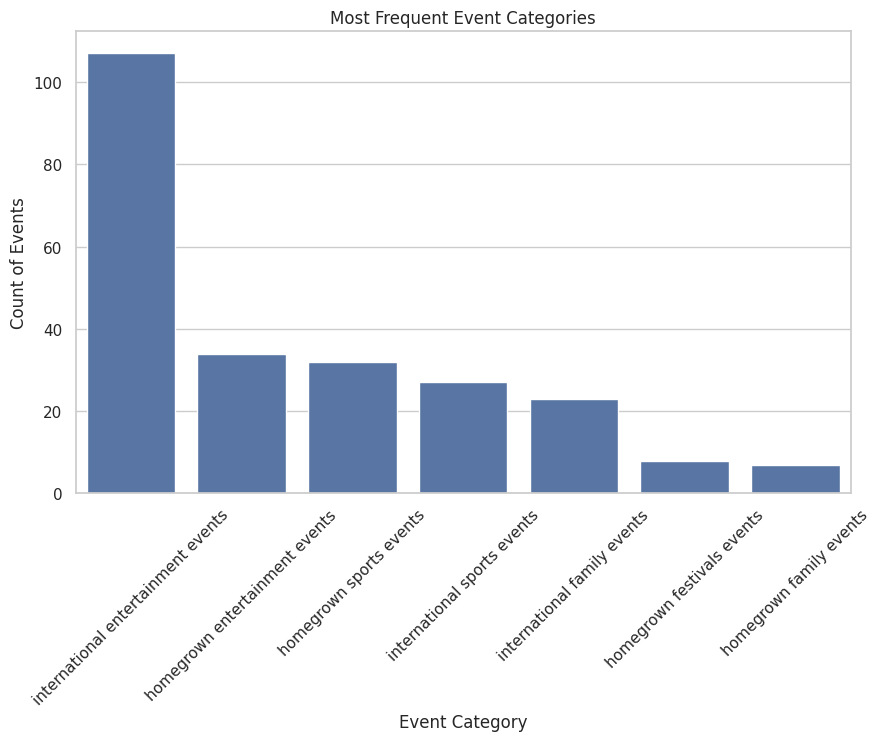

Event_Category
international entertainment events    107
homegrown entertainment events         34
homegrown sports events                32
international sports events            27
international family events            23
homegrown festivals events              8
homegrown family events                 7
Name: count, dtype: int64


In [738]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of events per category
plt.figure(figsize=(10, 6))
sns.countplot(data=events_df, x='Event_Category', order=events_df['Event_Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Most Frequent Event Categories')
plt.xlabel('Event Category')
plt.ylabel('Count of Events')
plt.show()

# Display value counts
event_category_counts = events_df['Event_Category'].value_counts()
print(event_category_counts)


## Which event locations (Event_Location) host the most events?##

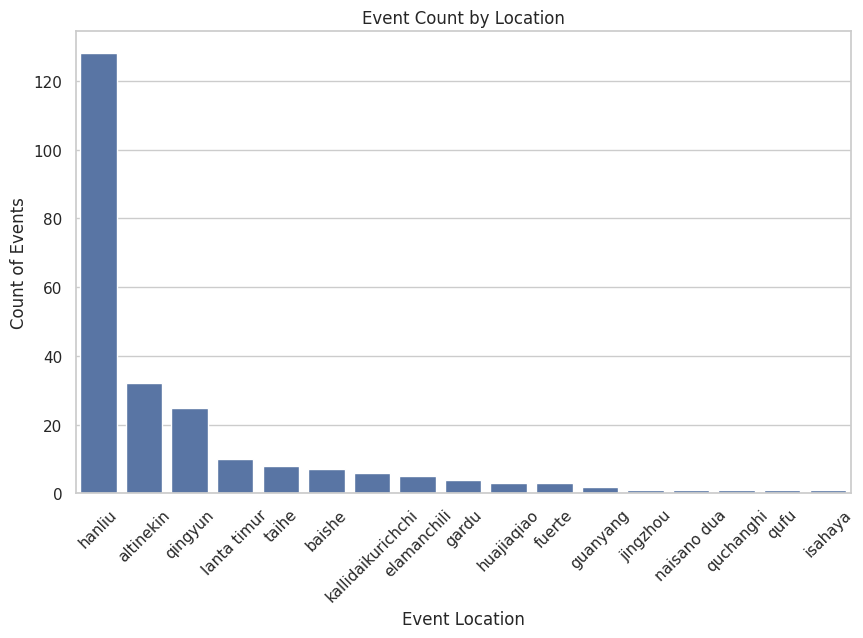

Event_Location
hanliu               128
altinekin             32
qingyun               25
lanta timur           10
taihe                  8
baishe                 7
kallidaikurichchi      6
elamanchili            5
gardu                  4
huajiaqiao             3
fuerte                 3
guanyang               2
jingzhou               1
naisano dua            1
quchanghi              1
qufu                   1
isahaya                1
Name: count, dtype: int64


In [739]:
# Count of events per location
plt.figure(figsize=(10, 6))
sns.countplot(data=events_df, x='Event_Location', order=events_df['Event_Location'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Event Count by Location')
plt.xlabel('Event Location')
plt.ylabel('Count of Events')
plt.show()

# Display value counts
event_location_counts = events_df['Event_Location'].value_counts()
print(event_location_counts)


## How many events are classified as strategic (Is_Strategic_Project)?

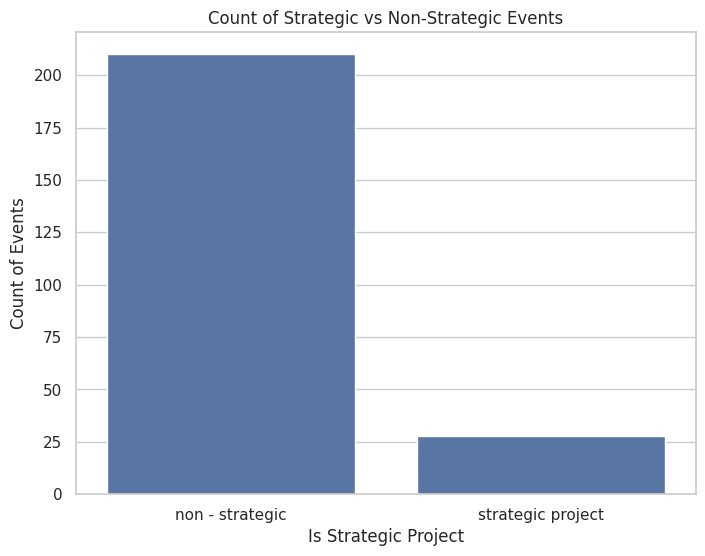

Is_Strategic_Project
non - strategic      210
strategic project     28
Name: count, dtype: int64


In [740]:
# Count of strategic vs non-strategic events
plt.figure(figsize=(8, 6))
sns.countplot(data=events_df, x='Is_Strategic_Project')
plt.title('Count of Strategic vs Non-Strategic Events')
plt.xlabel('Is Strategic Project')
plt.ylabel('Count of Events')
plt.show()

# Display value counts
strategic_project_counts = events_df['Is_Strategic_Project'].value_counts()
print(strategic_project_counts)


## What is the distribution of Expected_Attendees across all events?

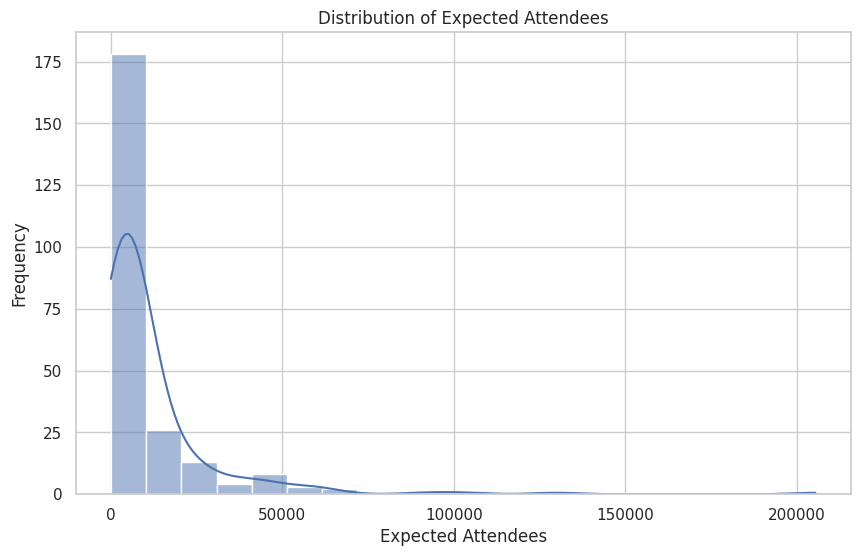

count       238.000000
mean      11614.647059
std       20682.153490
min          44.000000
25%        3333.000000
50%        4751.000000
75%       10531.250000
max      205446.000000
Name: Expected_Attendees, dtype: float64


In [741]:
# Distribution of Expected Attendees
plt.figure(figsize=(10, 6))
sns.histplot(events_df['Expected_Attendees'], bins=20, kde=True)
plt.title('Distribution of Expected Attendees')
plt.xlabel('Expected Attendees')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for Expected Attendees
expected_attendees_stats = events_df['Expected_Attendees'].describe()
print(expected_attendees_stats)


## How does Event_Cost vary by event type (Event_Category or Event_Vertical)?

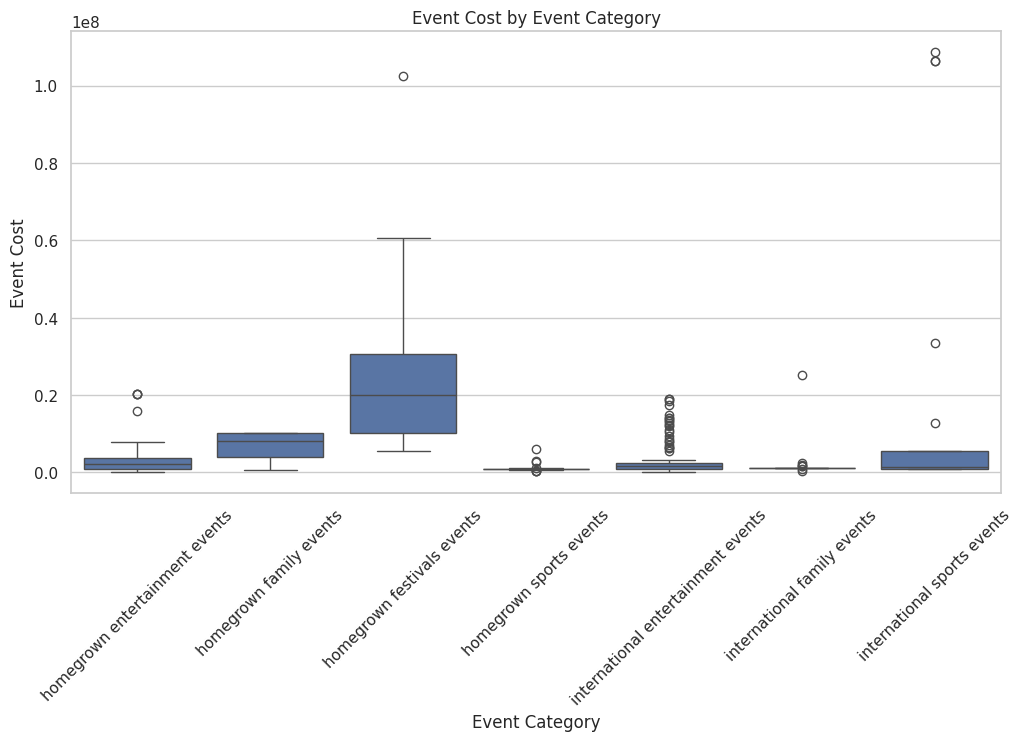

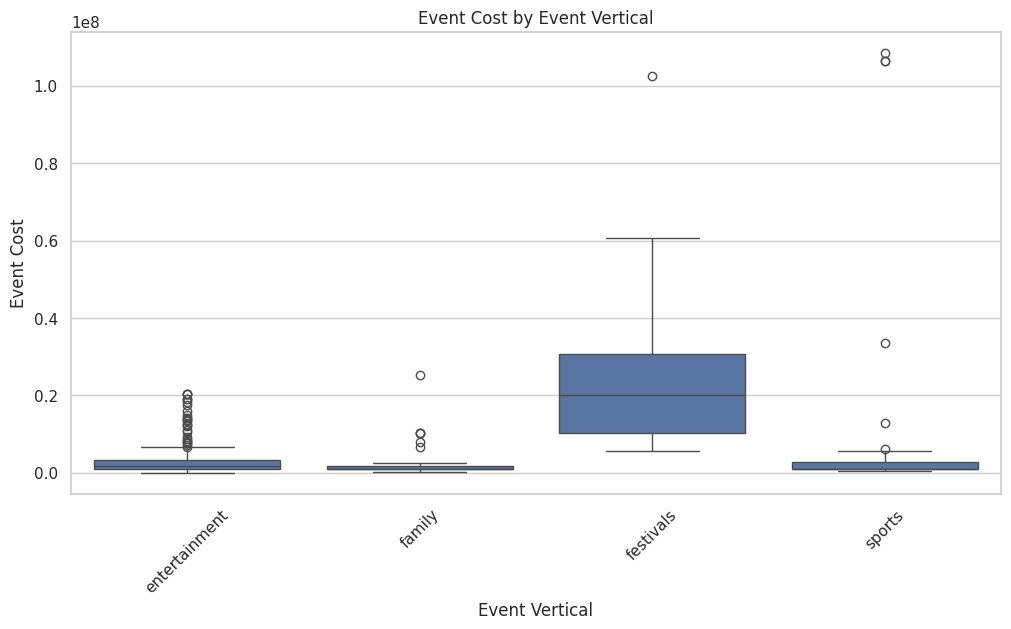

                                    count          mean           std  \
Event_Category                                                          
homegrown entertainment events       34.0  4.256555e+06  5.811877e+06   
homegrown family events               7.0  6.733171e+06  4.207990e+06   
homegrown festivals events            8.0  3.125032e+07  3.348926e+07   
homegrown sports events              32.0  1.130055e+06  1.054987e+06   
international entertainment events  107.0  3.551063e+06  4.728739e+06   
international family events          23.0  2.199744e+06  5.019088e+06   
international sports events          27.0  1.562775e+07  3.358227e+07   

                                          min         25%         50%  \
Event_Category                                                          
homegrown entertainment events       242000.0    893250.0   2206596.0   
homegrown family events              592000.0   3917000.0   8010196.0   
homegrown festivals events          5592000.0  102

<ipython-input-742-1697306b8911>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_cost_stats = events_df.groupby('Event_Category')['Event_Cost'].describe()


In [742]:
# Boxplot of Event Cost by Event Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=events_df, x='Event_Category', y='Event_Cost')
plt.xticks(rotation=45)
plt.title('Event Cost by Event Category')
plt.xlabel('Event Category')
plt.ylabel('Event Cost')
plt.show()

# Boxplot of Event Cost by Event Vertical
plt.figure(figsize=(12, 6))
sns.boxplot(data=events_df, x='Event_Vertical', y='Event_Cost')
plt.xticks(rotation=45)
plt.title('Event Cost by Event Vertical')
plt.xlabel('Event Vertical')
plt.ylabel('Event Cost')
plt.show()

# Summary statistics for Event Cost
event_cost_stats = events_df.groupby('Event_Category')['Event_Cost'].describe()
print(event_cost_stats)


## Is there a correlation between Event_Cost and Expected_Attendees?

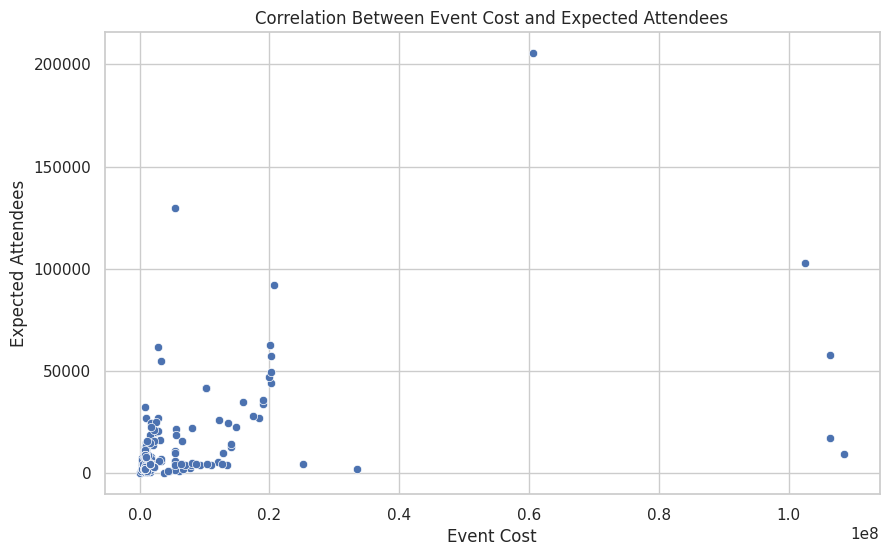

Correlation between Event Cost and Expected Attendees:
                    Event_Cost  Expected_Attendees
Event_Cost            1.000000            0.478643
Expected_Attendees    0.478643            1.000000


In [743]:
# Scatterplot to show correlation between Event Cost and Expected Attendees
plt.figure(figsize=(10, 6))
sns.scatterplot(data=events_df, x='Event_Cost', y='Expected_Attendees')
plt.title('Correlation Between Event Cost and Expected Attendees')
plt.xlabel('Event Cost')
plt.ylabel('Expected Attendees')
plt.show()

# Calculate the Pearson correlation between Event Cost and Expected Attendees
correlation = events_df[['Event_Cost', 'Expected_Attendees']].corr()
print('Correlation between Event Cost and Expected Attendees:')
print(correlation)


## What are the most common months or seasons for events to occur?

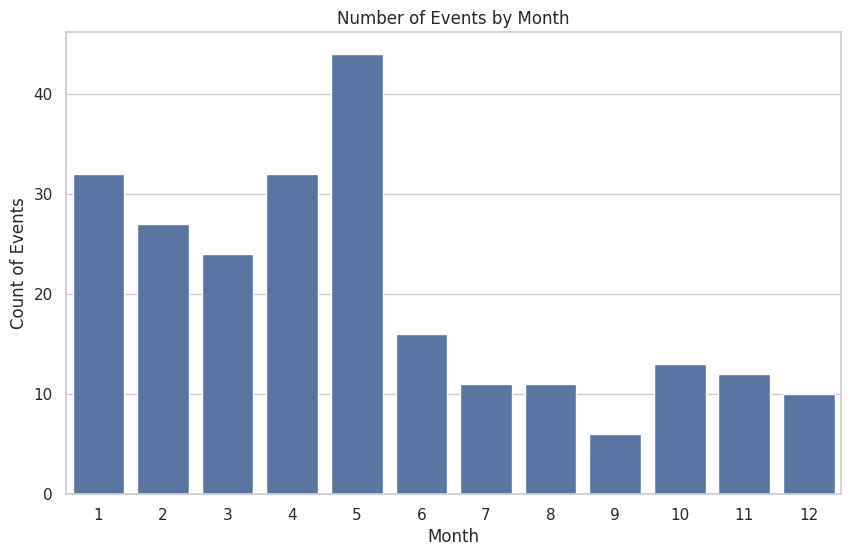

Month
1     32
2     27
3     24
4     32
5     44
6     16
7     11
8     11
9      6
10    13
11    12
12    10
Name: count, dtype: int64


In [744]:
# Convert Event_Start_Date to datetime if not already
events_df['Event_Start_Date'] = pd.to_datetime(events_df['Event_Start_Date'])

# Create a new column for the month
events_df['Month'] = events_df['Event_Start_Date'].dt.month

# Plot the count of events per month
plt.figure(figsize=(10, 6))
sns.countplot(data=events_df, x='Month')
plt.title('Number of Events by Month')
plt.xlabel('Month')
plt.ylabel('Count of Events')
plt.show()

# Display the value counts for events by month
event_month_counts = events_df['Month'].value_counts().sort_index()
print(event_month_counts)


## How do Expected_Attendees and Event_Cost trend over time?

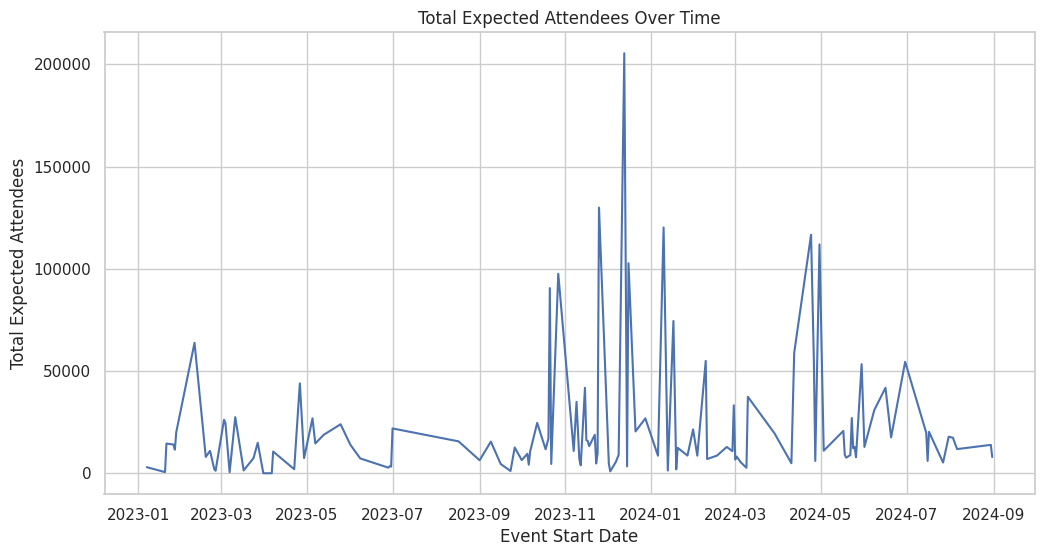

In [745]:
# Group data by Event Start Date and calculate total Expected Attendees per date
daily_attendance = events_df.groupby('Event_Start_Date')['Expected_Attendees'].sum().reset_index()

# Plot Expected Attendees over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_attendance, x='Event_Start_Date', y='Expected_Attendees')
plt.title('Total Expected Attendees Over Time')
plt.xlabel('Event Start Date')
plt.ylabel('Total Expected Attendees')
plt.show()


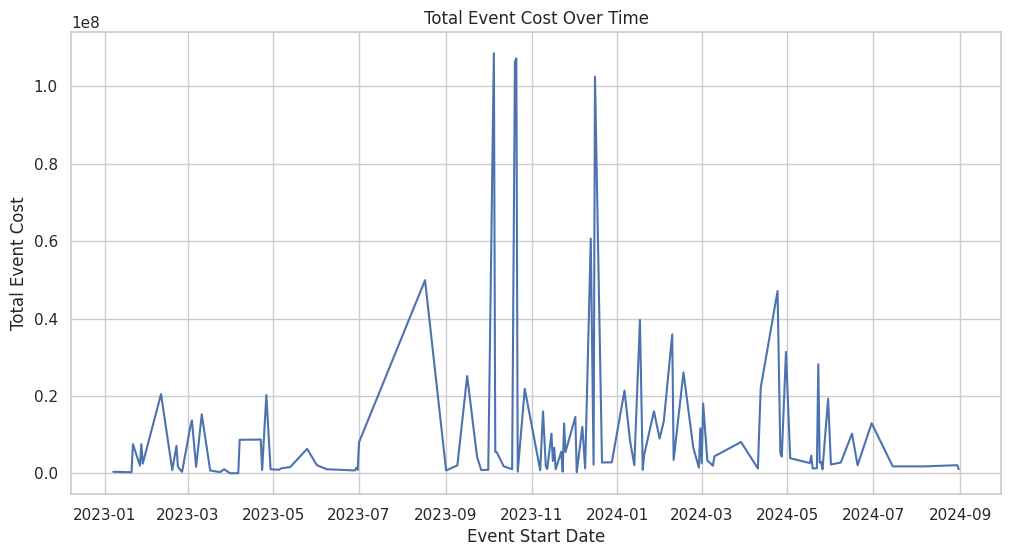

In [746]:
# Group data by Event Start Date and calculate total Event Cost per date
daily_cost = events_df.groupby('Event_Start_Date')['Event_Cost'].sum().reset_index()

# Plot Event Cost over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_cost, x='Event_Start_Date', y='Event_Cost')
plt.title('Total Event Cost Over Time')
plt.xlabel('Event Start Date')
plt.ylabel('Total Event Cost')
plt.show()


## How long are events typically, and how does this vary by event type?

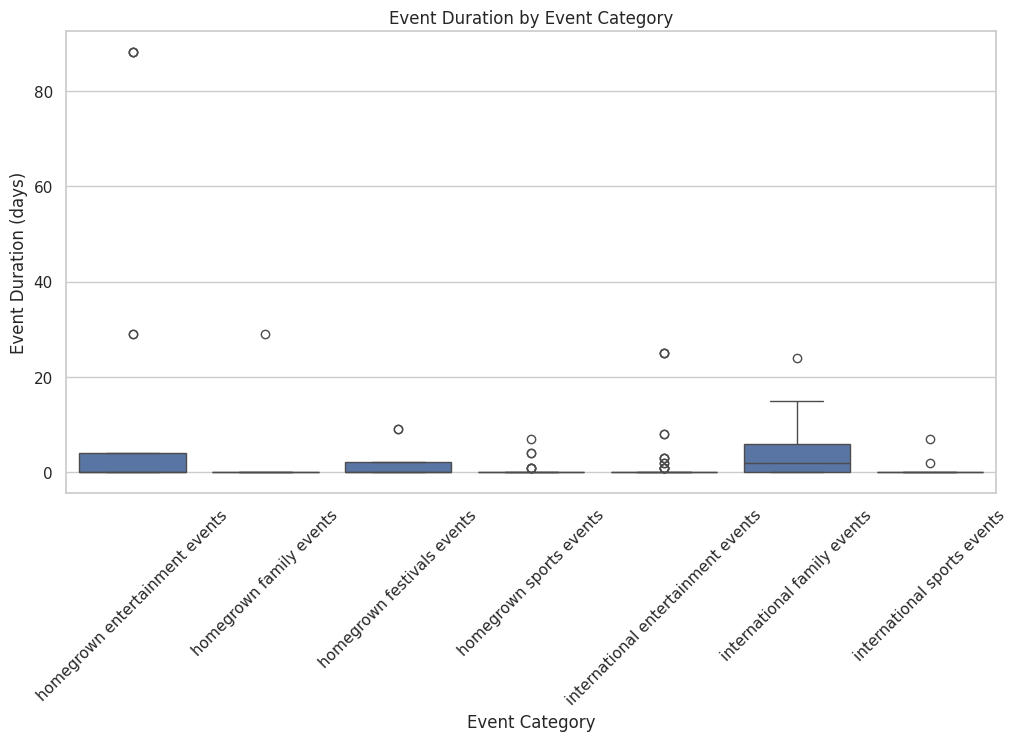

                                    count       mean        std  min  25%  \
Event_Category                                                              
homegrown entertainment events       34.0  10.470588  25.415618  0.0  0.0   
homegrown family events               7.0   4.142857  10.960970  0.0  0.0   
homegrown festivals events            8.0   2.250000   4.166190  0.0  0.0   
homegrown sports events              32.0   0.593750   1.542084  0.0  0.0   
international entertainment events  107.0   1.018692   4.269199  0.0  0.0   
international family events          23.0   4.043478   6.071380  0.0  0.0   
international sports events          27.0   0.333333   1.386750  0.0  0.0   

                                    50%   75%   max  
Event_Category                                       
homegrown entertainment events      0.0  4.00  88.0  
homegrown family events             0.0  0.00  29.0  
homegrown festivals events          0.0  2.25   9.0  
homegrown sports events             

<ipython-input-747-795a21e4154c>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_duration_stats = events_df.groupby('Event_Category')['Event_Duration'].describe()


In [747]:
# Calculate Event Duration in days by subtracting Event_Start_Date from Event_End_Date
events_df['Event_Duration'] = (events_df['Event_End_Date'] - events_df['Event_Start_Date']).dt.days

# Boxplot of Event Duration by Event Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=events_df, x='Event_Category', y='Event_Duration')
plt.xticks(rotation=45)
plt.title('Event Duration by Event Category')
plt.xlabel('Event Category')
plt.ylabel('Event Duration (days)')
plt.show()

# Summary statistics for Event Duration
event_duration_stats = events_df.groupby('Event_Category')['Event_Duration'].describe()
print(event_duration_stats)


# 4. Feature Engineering

**Objective:**
- The aim of this section is to enhance the dataset by generating new features that can improve the predictive power of the model. By combining event and hotel data and adding meaningful features, the model will better capture the relationships between events and hotel performance metrics.

**Key Activities:**
- Prepare the dataset by merging to have a unified dataset
- Generate new features that enrich the dataset for predictive modeling
- Remove redundant or irrelevant features/columns that don't add value to the analysis.
- Normalize or scale features to handle differences in the range of values

**Expected Outcomes:**
- A well-structured, enriched dataset that includes event-specific, temporal, and rolling average features.
- Improved model input with reduced redundancy and better explanatory power.
- A dataset optimized for capturing the impact of events on hotel performance, setting the stage for model training and evaluation.

## 4.1 Merging / Joining the Datasets

**Context-Problem:**
- The `events_df` dataset contains information about events, while `hotels_df` holds hotel performance metrics. To analyze the relationship between events and hotel performance, we need to merge both datasets using `Record_Date`. However, for this analysis, only the records where events exist and align with the hotel performance data should be retained, meaning we want to remove any records that do not have a corresponding event.

**Assumptions:**
- The merge will be based on the `Event_Start_Date`, as it is assumed that the start of an event has the primary influence on hotel performance metrics. People typically book hotel stays leading up to the event and on the day of the event, rather than afterward. Thus, the event end date is considered less relevant for immediate hotel performance and will not be used in this merge.

**Action Steps:**
- Perform an inner join between `events_df` and `hotels_df` on `Record_Date` and `Event_Start_Date` to ensure that only matched records are kept, removing any entries where no event data exists.
- Inspect the merged dataset to verify that only relevant records remain and that both the `Event_Start_Date` and `Event_End_Date` columns are retained for further use.

In [722]:
# Step 1: Merge events_df into hotels_df on Record_Date using Event_Start_Date with an inner join to exclude unmatched records
merged_df = pd.merge(hotels_df, events_df, how='inner', left_on='Record_Date', right_on='Event_Start_Date')

# Step 2: Check for missing values (should be zero after inner join)
missing_data = merged_df.isnull().sum()
print("Missing Data After Merge:\n", missing_data)

# Step 3: Preview the merged dataset to ensure it has been merged correctly
print(merged_df.head())

# Step 4: Ensure Event_Start_Date and Event_End_Date are retained for future use
print("Merged DataFrame Columns:\n", merged_df.columns)


Missing Data After Merge:
 Record_Date              0
Average_Room_Rate        0
Occupancy_Rate           0
Total_Guests             0
Domestic_Guests          0
International_Guests     0
Event_Name               0
Event_Parent_Category    0
Event_Vertical           0
Event_Category           0
Business_Model           0
Is_Strategic_Project     0
Event_Start_Date         0
Event_End_Date           0
Event_Location           0
Expected_Attendees       0
Event_Cost               0
dtype: int64
  Record_Date  Average_Room_Rate  Occupancy_Rate  Total_Guests  \
0  2023-01-07         335.639521        0.439412         33671   
1  2023-01-20         282.558684        0.516570         34323   
2  2023-01-21         301.248487        0.535010         36472   
3  2023-01-21         301.248487        0.535010         36472   
4  2023-01-21         301.248487        0.535010         36472   

   Domestic_Guests  International_Guests       Event_Name  \
0            13075               13767.0   

**Notes:**
- The inner join ensures that only records where both datasets match on `Record_Date` and `Event_Start_Date` are retained.
- This eliminates any rows from `hotels_df` where no corresponding event exists, and vice versa, resulting in a clean, focused dataset.
- The `Event_Start_Date` and `Event_End_Date` columns are still kept for future analysis or feature engineering tasks.

## 4.2. Generate New Features

Here’s the updated commentary for **generating new features**, now including the `Month_of_Event` feature:

---

**Context:**
- To enrich the dataset for predictive modeling, three new features will be created: `Average Daily Revenue`, `Event Duration`, and `Month_of_Event`. These features are designed to capture key elements related to hotel performance and events, enhancing the dataset for predictive analysis.

**Assumptions:**
1. **Average Daily Revenue (ADR)** provides a more comprehensive measure of hotel performance than considering `Average Room Rate` and `Total Guests` separately. A balance between room rates and guest volumes will provide a clearer picture of revenue and profitability.
2. **Event Duration** is a significant factor in hotel performance. Longer events may prompt guests to book hotel stays, affecting occupancy rates and total guests, while shorter events may not have the same impact.
3. **Month_of_Event** captures the seasonal influence on hotel performance metrics. Events held during peak seasons, such as holidays, are likely to see higher attendance and, in turn, greater hotel occupancy and revenue due to increased demand.

**Action Steps:**
- Create the `Average Daily Revenue` feature by multiplying `Average Room Rate` with `Total Guests`.
- Generate the `Event Duration` feature by calculating the difference between `Event_End_Date` and `Event_Start_Date` and adding 1 to account for the full duration.
- Create the `Month_of_Event` feature by extracting the month from `Event_Start_Date` to capture the potential seasonality impact.
- Ensure the dataset is updated with these new features for future analysis and predictive modeling.

In [723]:
# Step 1: Generate Average Daily Revenue feature
merged_df['Average_Daily_Revenue'] = merged_df['Average_Room_Rate'] * merged_df['Total_Guests']

# Step 2: Generate Event Duration feature (adding 1 to include both start and end dates in the duration)
merged_df['Event_Duration'] = (merged_df['Event_End_Date'] - merged_df['Event_Start_Date']).dt.days + 1

# Step 3: Generate Month_of_Event feature by extracting the month from Event_Start_Date and setting it as a category type
merged_df['Month_of_Event'] = merged_df['Event_Start_Date'].dt.month.astype('category')

# Step 4: Preview the newly added features
print(merged_df[['Average_Daily_Revenue', 'Event_Duration', 'Month_of_Event']].head())


   Average_Daily_Revenue  Event_Duration Month_of_Event
0           1.130132e+07               1              1
1           9.698262e+06               1              1
2           1.098713e+07               1              1
3           1.098713e+07               1              1
4           1.098713e+07               1              1


## 4.3. Removing Redundant Data

**Context:**
- To streamline the dataset for predictive modeling, several columns that do not directly contribute to hotel performance metrics will be removed. These columns either provide irrelevant information, are already captured by other features, or do not significantly impact the target metrics.

**Assumptions:**
- **Event_Name** is highly variable and does not consistently relate to hotel performance metrics.
- **Event_Parent_Category** and **Event_Vertical** are already captured by the more granular **Event_Category** feature.
- **Business_Model**, **Event_Cost** and **Is_Strategic_Project** do not directly influence hotel performance metrics.
- **Event_Start_Date** has been merged with **Record_Date**, and **Event_End_Date** has already been used to calculate **Event_Duration**.
- **Event_Location** is not useful without corresponding hotel location data for segmentation.
- **Record_Date** will be used as an index but removed as a feature as it does not contribute directly to the analysis.
- **Average_Room_Rate** and **Total_Guests** are better represented by the **Average_Daily_Revenue** feature.
- **Domestic_Guests** and **International_Guests** provide demographic insights but do not directly inform hotel performance metrics.

**Action Steps:**
- Set `Record_Date` as an index but remove it as a feature.
- Create a new variable for the dataset without the following redundant columns: `Event_Name`, `Event_Parent_Category`, `Event_Vertical`, `Business_Model`, `Is_Strategic_Project`, `Event_Start_Date`, `Event_End_Date`, `Event_Location`, `Average_Room_Rate`, `Total_Guests`, `Domestic_Guests`, and `International_Guests`.
- Ensure that the remaining dataset is focused on meaningful features for predictive modeling.

In [726]:
# Step 1: Set Record_Date as the index in the new dataset
cleaned_df = merged_df.set_index('Record_Date')

# Step 2: Specify the redundant columns to remove
columns_to_remove = [
    'Event_Name',
    'Event_Parent_Category',
    'Event_Vertical',
    'Business_Model',
    'Is_Strategic_Project',
    'Event_Cost',

    'Event_Start_Date',
    'Event_End_Date',
    'Average_Room_Rate',
    'Total_Guests',
    'Domestic_Guests',
    'International_Guests'
]

# Step 3: Create the cleaned dataset by dropping the redundant columns
cleaned_df = cleaned_df.drop(columns=columns_to_remove)

# Step 4: Preview the cleaned dataset
print(cleaned_df.head())
print(cleaned_df.dtypes)
print(cleaned_df.shape)


             Occupancy_Rate                      Event_Category  \
Record_Date                                                       
2023-01-07         0.439412  international entertainment events   
2023-01-20         0.516570      homegrown entertainment events   
2023-01-21         0.535010         international sports events   
2023-01-21         0.535010  international entertainment events   
2023-01-21         0.535010         international sports events   

                Event_Location  Expected_Attendees  Average_Daily_Revenue  \
Record_Date                                                                 
2023-01-07              hanliu                3016           1.130132e+07   
2023-01-20   kallidaikurichchi                 601           9.698262e+06   
2023-01-21           altinekin                 856           1.098713e+07   
2023-01-21              hanliu                3886           1.098713e+07   
2023-01-21              hanliu                9824           1.09871

# 5. Model Selection & Design

**Objective:**
- The goal of this stage is to build, train, and evaluate multiple predictive models to forecast hotel performance metrics. Specifically, the models will predict two key targets: `average_daily_revenue` and `occupancy_rate`, based on event-related features. By comparing various models (Multi-variate Regression, LSTM, and XGBoost), we aim to identify the best-performing model for the task.

**Key Activities:**
1. **Model Selection:**
   - Choose three models: Multi-variate Regression, LSTM (for time series data), and XGBoost (a powerful gradient boosting algorithm).
   
2. **Model Design:**
   - Implement models that can handle both categorical and numerical data, including embedding layers for categorical features and scaling/normalization for numerical features.

3. **Data Preparation:**
   - Prepare the dataset (`cleaned_df`) for training, testing, and evaluation by splitting the data into training and testing sets.
   
4. **Model Training:**
   - Train each model on the training dataset using the selected features (`Event_Category`, `Event_Duration`, `Event_Expected_Attendees`, `Month_of_Event`, `Event_Location`) and predict the targets (`average_daily_revenue`, `occupancy_rate`).

5. **Model Evaluation:**
   - Evaluate each model on the test dataset using relevant performance metrics (e.g., R-Squared, F1-Score, and Accuracy).

6. **Performance Comparison:**
   - Compare the performance metrics of all models and visualize the predicted vs. actual values for each model using performance graphs.

**Expected Outcome:**
- A set of well-trained predictive models capable of forecasting hotel performance based on event features.
- Clear performance metrics (R-Squared, F1-Score, Accuracy) for each model to determine the best-performing model.
- Visualizations to assess the predictive accuracy of each model and compare their performance on the test data.

In [733]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# One-hot encode the categorical columns
cleaned_df_encoded = pd.get_dummies(cleaned_df, columns=['Event_Category', 'Event_Location', 'Month_of_Event'])

# Define features and targets
features = ['Event_Duration', 'Expected_Attendees'] + [col for col in cleaned_df_encoded.columns if 'Event_Category_' in col or 'Event_Location_' in col or 'Month_of_Event_' in col]
targets = ['Occupancy_Rate', 'Average_Daily_Revenue']

# Scale the features and target variables
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(cleaned_df_encoded[features])
scaled_targets = scaler.fit_transform(cleaned_df_encoded[targets])

# Convert to numpy arrays for LSTM input
X = np.array(scaled_features)
y = np.array(scaled_targets)

# Reshape the features for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Display the shape of the prepared data
print(f"Feature data shape: {X.shape}")
print(f"Target data shape: {y.shape}")


Feature data shape: (238, 1, 38)
Target data shape: (238, 2)


In [734]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()

# Add the LSTM layer
model.add(LSTM(units=64, return_sequences=False, input_shape=(X.shape[1], X.shape[2])))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Output layer predicting two values (Occupancy_Rate and Average_Daily_Revenue)
model.add(Dense(units=2))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 64)                  │          26,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,498 (103.51 KB)

 Trainable params: 26,498 (103.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.2373 - val_loss: 0.0726
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1691 - val_loss: 0.0396
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1149 - val_loss: 0.0221
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - val_loss: 0.0188
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0366 - val_loss: 0.0226
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - val_loss: 0.0251
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0239 - val_loss: 0.0228
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0222 - val_loss: 0.0208
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - val_loss: 0.0186
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - val_loss: 0.0169
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - val_loss: 0.0160
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 - val_l

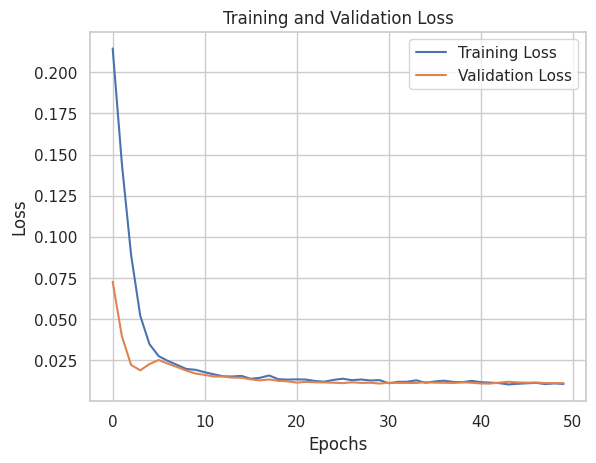

In [735]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [736]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse scale the predictions and the actual values to compare
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Display the first few predictions vs actual values
for i in range(5):
    print(f"Predicted: {y_pred_original[i]}, Actual: {y_test_original[i]}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step
Predicted: [5.3515792e-01 1.0065864e+07], Actual: [5.48325047e-01 1.14936698e+07]
Predicted: [5.5994505e-01 1.2227891e+07], Actual: [5.48325047e-01 1.14936698e+07]
Predicted: [5.341329e-01 9.973008e+06], Actual: [5.35908869e-01 1.21212280e+07]
Predicted: [5.3426903e-01 9.9853270e+06], Actual: [5.35908869e-01 1.21212280e+07]
Predicted: [5.338010e-01 9.942997e+06], Actual: [5.35908869e-01 1.21212280e+07]


In [737]:
from sklearn.metrics import mean_squared_error

# Calculate performance metrics for both target variables
mse_occupancy_rate = mean_squared_error(y_test_original[:, 0], y_pred_original[:, 0])
mse_average_daily_revenue = mean_squared_error(y_test_original[:, 1], y_pred_original[:, 1])

print(f"Mean Squared Error for Occupancy Rate: {mse_occupancy_rate}")
print(f"Mean Squared Error for Average Daily Revenue: {mse_average_daily_revenue}")


Mean Squared Error for Occupancy Rate: 0.002147807591319726
Mean Squared Error for Average Daily Revenue: 19246341974888.06
